# Sharks and Samples

Nishka Saxena, Jihan Karim, Sanika Pande

## 1. Introduction

**Dataset Introduction:** The dataset provides comprehensive analysis of companies that have appeared on the popular reality television show, Shark Tank. The show consists of entreprenuers pitching their business idea to a panel of investors, or sharks, in hopes of securing a deal that exchanges a share of the company for funding. The dataset includes information on company names, entrepreneurs, funding received, product descriptions, the sharks involved, and more.

**Populations and Samples:** The dataset represents a sample, not a full population. This is because not every single company that has been on the show is in our dataset. Our population of interest would be all entrepreneurial companies that have been on Shark Tank, while our dataset only contains a portion of companies. In addition, this dataset has information from Seasons 1-6; there have been more episodes aired since then.

**Research Questions:** What proportion of startups in this dataset received a deal on Shark Tank?

What are a range of reasonable values for the true proportion of all startups appearing on Shark Tank that receive a deal?

**Contextual Importance:** Exploring the proportion of startups that receive a deal on Shark Tank gives us insight into how comepetitive and selective the investment process can be. This can help both entrepreneurs and investors. For entrepreneurs, this can help them prepare for a business pitch and how likely they are going to get funded. For investors, this can illustrate decisions over time and how they should navigate future financial endeavors.

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score, roc_curve




In [96]:
df = pd.read_csv('shark_tank_companies.csv')
df.sample(5)

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers
5,True,One of the first entrepreneurs to pitch on Sha...,2,Specialty Food,Susan Knapp,"Napa Valley, CA",http://www.aperfectpear.com,500000,15,3333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2,False
432,True,Scratch & Grain Baking Co. makes the most whol...,14,Specialty Food,Leah Tutin and Taya Geiger,"Portland, OR",http://www.scratchandgrain.com,150000,20,750000,6,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Scratch & Grain Baking Co.,6-14,True
38,True,Women's apparel specially designed for sizes 1...,9,Women's Apparel,Gayla Bentley,"Houston, TX",http://www.gaylabentley.com/,250000,20,1250000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Gayla Bentley Fashion,1-9,False
121,True,"The Painted Pretzel sells creative, gourmet ch...",6,Specialty Food,Raven Thomas,"Scottsdale, AZ",http://www.thepaintedpretzel.com/,100000,25,400000,3,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,The Painted Pretzel,3-6,False
397,False,The Jungle Jumparoo is a special kind of jump ...,5,Toys and Games,Rachel and Steve McMurtrey,"Orem, UT",http://junglejumparoo.com/,100000,20,500000,6,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Jungle Jumparoo,6-5,True


## 2. Confidence Interval Analytical Tasks

**Objective to Answer:** What proportion of startups in this dataset received a deal on Shark Tank?

What are a range of reasonable values for the true proportion of all startups appearing on Shark Tank that receive a deal?

In [97]:
df['deal'] = df['deal'].dropna()
df['deal'].value_counts(dropna=False)

deal
True     251
False    244
Name: count, dtype: int64

We made sure to drop any cases that do not have True or False listed for the 'deal' variable.

In [98]:
df_true = df[df['deal'] == True]
df_true.head()

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
5,True,One of the first entrepreneurs to pitch on Sha...,2,Specialty Food,Susan Knapp,"Napa Valley, CA",http://www.aperfectpear.com,500000,15,3333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2,False
9,True,An educational record label and publishing hou...,2,Education,Mark Furigay,"Chicago, IL",NaN,250000,10,2500000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Classroom Jams,1-2,False
10,True,A battery-operated cooking device that siphons...,3,Kitchen Tools,Marian Cruz,"San Francisco, CA",NaN,35000,35,100000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Turbobaster,1-3,False


In [99]:
p = len(df_true)/len(df)
n = len(df)
print('proportion of true deals:', p)
print('sample size:', n)

proportion of true deals: 0.5070707070707071
sample size: 495


In [100]:
df['valuation'].describe()

count    4.950000e+02
mean     2.165615e+06
std      3.761971e+06
min      4.000000e+04
25%      4.400000e+05
50%      1.000000e+06
75%      2.000000e+06
max      3.000000e+07
Name: valuation, dtype: float64

From the numerical summary of the valuations of the companies, it looks like the mean value of a company that comes onto Shark Tank is $2,000,000. The highest valued company was at $30,000,000, and the lowest was at $40,000, which tells us that most of the companies are smaller companies. 

In [101]:
sample_stats = []

for i in range(5000):
    sample = df['deal'].sample(n=len(df), replace=True)
    sample_stats.append(sample.mean())

df_ci = pd.DataFrame(sample_stats)

lower = df_ci.quantile(0.05)
upper = df_ci.quantile(0.95)

(lower, upper)


(0    0.470606
 Name: 0.05, dtype: float64,
 0    0.543434
 Name: 0.95, dtype: float64)

Our Confidence Interval range was 0.471 to 0.5434. We are 90% confident that our true proportion of companies that secure a deal on Shark Tank falls into the range of 47.10% to 54.34% of the companies. 

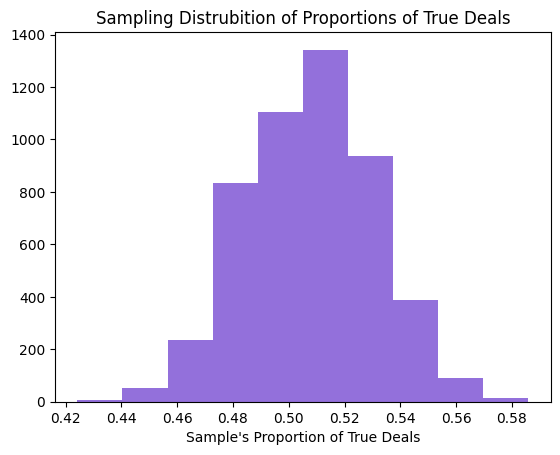

In [102]:
plt.hist(df_ci, color='mediumpurple')
plt.xlabel("Sample's Proportion of True Deals")
plt.title("Sampling Distrubition of Proportions of True Deals")
plt.show()

## 3. Hypothesis Testing Analytical Tasks

For our hypothesis test, we will look at the "exchangeforstake" variable, which describes the % stake offered to the sharks by the contestants. For the research question, we will look at what are the summary measures of the "exchangeforstake" variable in the dataset.

In [103]:
df['exchangeforstake'] = df['exchangeforstake'].dropna()
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [104]:
df["exchangeforstake"].describe()

count    495.000000
mean      17.539394
std       10.061047
min        3.000000
25%       10.000000
50%       15.000000
75%       20.000000
max      100.000000
Name: exchangeforstake, dtype: float64

(array([185., 196.,  81.,  23.,   8.,   0.,   1.,   0.,   0.,   1.]),
 array([  3. ,  12.7,  22.4,  32.1,  41.8,  51.5,  61.2,  70.9,  80.6,
         90.3, 100. ]),
 <BarContainer object of 10 artists>)

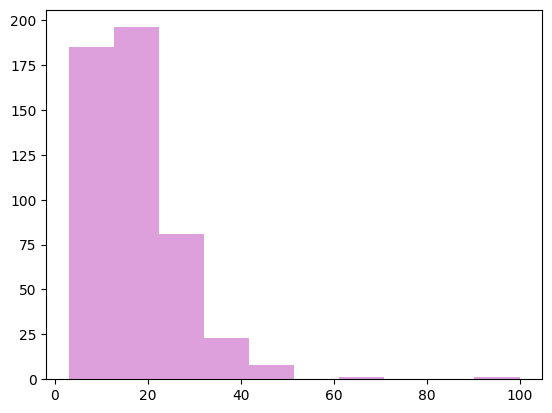

In [105]:
plt.hist(df['exchangeforstake'], color='plum')

The exchange for stake variable describes the percentage of company ownership the entrepeneur offers a stakeholder to own. The median of the exchange for stake variable in the Shark Tank dataset is 15%. This distribution's mean is around 17%, which is reflected by the skewed right shape of the histogram. The minimum value offered was 3% and the max is 100%. The max and other upper outliers is what seems to be skewing the distribution right. 

The most appropriate measure of center to describe this variable is the median because the distribution is right-skewed.

**Hypothesis Test**

We will be using the sample data(df) here as a stand-in for the population data. The median of the sample data is 15.

$H_0: M = 15$

$H_a: M < 15$

We are setting a significance level of $\alpha = 0.05$.

These samples are independent of each other, are representative of the population we are considering, have a sample size equal to the number of samples in the original dataset, and drawn with replacement.  

In [106]:
simulated_stats = []
for i in range(5000):
    df_sample = df.sample(n=len(df), replace=True)
    simulated_stats.append(df_sample["exchangeforstake"].median())
simulated_stats = pd.DataFrame({"median exchangeforstake value": simulated_stats})
simulated_stats

,median exchangeforstake value
0,15.0
1,15.0
2,20.0
3,15.0
4,15.0
...,...
4995,15.0
4996,20.0
4997,15.0
4998,15.0


In [107]:
sample_median = df["exchangeforstake"].median()
sample_median

np.float64(15.0)

In [108]:
p_value = (simulated_stats["median exchangeforstake value"] <= sample_median).mean()
p_value

np.float64(0.9046)

Assuming that the true median is 15, there is a 90.22% chance of obtaining a sample median that is less than or equal to the observed sample mean. Because this p value is greater than the significance level, we fail to reject the null hypothesis. There is not sufficient evidence to suggest that the true median is less than 15.

**Summarization:** Based on our analysis, the 90% CI for the proportion of companies that received a deal on Shark Tank ranges from 0.471 to 0.5434. This indicates that we are 90% confident that the true proportion of startups securing a deal lies between 47.10% and 54.34%. Additionally, our hypothesis test produced a p-value of 0.903. We can assume that the median number of companies that receive a deal on Shark Tank in one season is around 15. This is much greater than our significance value, 0.05. As a result, we fail to reject the null hypothesis; there is not enough information to conclude that the true median is different from our hypothesized value.

<h2>4. Linear Regression</h2>

**Response Variables:** 

Linear Regression: A continuous variable representing the exchange of stake value (the amount of money or valuation tied to the equity offered). In our dataset, it is indicated as "askedfor".

Logistic Regression: A binary variable indicating whether the company received a deal (1) or did not receive a deal (0). In our dataset, it is indicated as "deal".


Research Question: What is the relationship between the percent of the company offered to a Shark, exchangeforstake, and the amount a company asks for on Shark Tank, askedfor, after controlling the valuation of the company, whether a deal was made, and whether multiple entrepreneurs were involved, both in the sample adn the underlying population? Additionally, how well does this model perform on new data?

In [109]:
df_model = df[['askedfor','exchangeforstake','valuation','deal','multiple_entreprenuers']].dropna()
df_model['deal'] = df_model['deal'].astype(int)

In [110]:
X = df_model[['exchangeforstake','valuation','multiple_entreprenuers','deal']]
y = df_model['askedfor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=207)

In [111]:
df_train = X_train.copy()
df_train['askedfor'] = y_train
df_test = X_test.copy()
df_test['askedfor'] = y_test

df_train.head()

,exchangeforstake,valuation,multiple_entreprenuers,deal,askedfor
485,20,750000,False,0,150000
278,10,750000,False,0,75000
446,10,1500000,False,1,150000
418,15,666667,False,0,100000
377,15,500000,True,1,75000


In [112]:
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[ 6.12863461e+03  8.41082176e-02 -1.38763243e+04 -6.05030833e+03]
-38518.99811727056


Equation for the linear model:

y_hat ​= −38518.998 + 6128.635⋅exchangeforstake + 0.0841⋅valuation − 13876.324⋅multiple_entreprenuers − 6050.308⋅deal

Interpretation of the slope for exchangeforstake:

Holding all other variables constant, for each additional 1% of the company value willing to exchange to a Shark, the amount a company asks for increases by $6,128.63 on average.

In [113]:
X_train['multiple_entreprenuers'] = X_train['multiple_entreprenuers'].astype(int)
X_test['multiple_entreprenuers'] = X_test['multiple_entreprenuers'].astype(int)
X_train.dtypes

exchangeforstake          int64
valuation                 int64
multiple_entreprenuers    int64
deal                      int64
dtype: object

In [114]:
X_train_sm = sm.add_constant(X_train)
ci_model = sm.OLS(y_train, X_train_sm).fit()
ci_model.conf_int()

,0,1
const,-87333.466157,10295.469914
exchangeforstake,4325.952884,7931.316335
valuation,0.078596,0.089620
multiple_entreprenuers,-49615.315125,21862.666588
deal,-40347.104475,28246.487824


There is a 95% confidence interval for the slope of exchangeforstake that ranges from 4325.95 to 7931.32. This means we are 95% confident that each additional 1% of the company value offered to a Shark means that there is between $4,326 and $7,931 more money being requested from a Shark, holding the other variables constant.

Since the entire confidence interval is above zero, this supports our conclusion that there is a positive relationship in the population between exchangeforstake and askedfor.

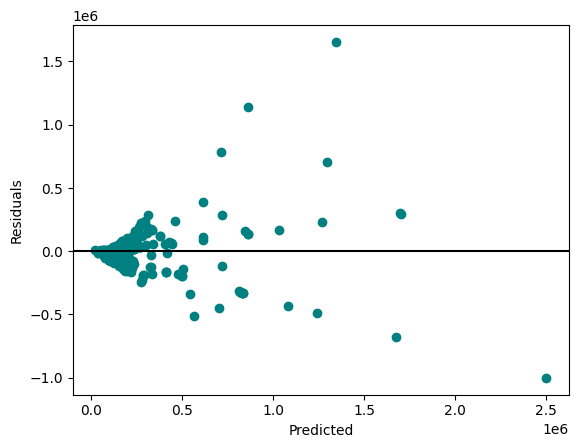

In [115]:
residuals = y_train - model.predict(X_train)

plt.scatter(model.predict(X_train), residuals, color = 'teal')
plt.axhline(0, color = 'black')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

The residuals are centered around zero, which is good for our model's performance. However, the spread of the residuals increases for larger predicted values, meaning the model is fitting smaller “askedfor” amounts better than larger ones. This shows that it is not the best model if there are many large values, which can be a bad for us since our Shark Tank dataset has a variety of large values. 

Text(0.5, 1.0, 'QQ Plot of Residuals')

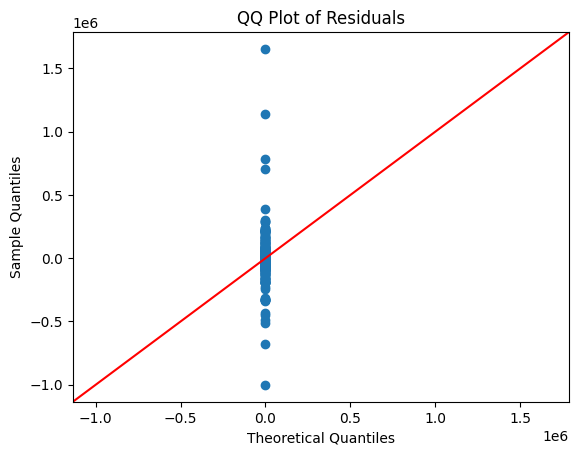

In [116]:
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")

In [117]:
print("Mean of residuals:", residuals.mean())
print("Standard deviation of residuals:", residuals.std())


Mean of residuals: 3.2925545567213886e-11
Standard deviation of residuals: 169237.24437693928


<h3>Model Performance </h3>

In [118]:
r2 = model.score(X_train, y_train)
preds = model.predict(X_test)
rmse = ((y_test - preds)**2).mean()**0.5
r2, rmse

(0.7080460791477835, np.float64(547654.3906951335))

The r^2 value tells us that about 70.8% of the variability in the amount a company asks for is explained by this model using the explanatory variables that we selected.

This is a decently high number, meaning the model sees that there is a strong relationship in the training data. However, there is still around 29% variability that isn't explained by our model, which means that there must be other factors that influence how much a company asks for from the Sharks on Shark Tank.


The test RMSE is $547,654.39, which means that on average, the model’s predictions have a variation from the true amount requested by about $548K. While this is a big number, since companies usually request very large amounts of money in Shark Tank, this RMSE is not unexpected.

<h2>5. Logistic Regression</h2>

**Research Question**: How does the amount asked for, whether or not there are multiple entrepreneurs, and the percentage of stake asked for relate to the log odds of whether a deal is given (1) or not (0). How does a classifier built on this model perform on new data? 

In [119]:
df["deal"] = df["deal"].astype(int)

In [120]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=207)
deal = smf.logit("deal ~ exchangeforstake + multiple_entreprenuers + askedfor", data=df_train).fit()
deal.summary()

Optimization terminated successfully.
         Current function value: 0.674387
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   deal   No. Observations:                  396
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            3
Date:                Sun, 14 Dec 2025   Pseudo R-squ.:                 0.02690
Time:                        22:14:17   Log-Likelihood:                -267.06
converged:                       True   LL-Null:                       -274.44
Covariance Type:            nonrobust   LLR p-value:                  0.002027
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.7549      0.263      2.870      0.004       0.239       1.270
multiple_entreprenuers[T.True]     0.0958      0.218      0.439      0.661      -0.332       0.523
exchangeforstake                  -0.0290      0.011     -2.596      0.009      -0.051      -0.007
askedfor                       -1.129e-06   4.24e-07     -2.661      0.008   -1.96e-06   -2.97e-07
==================================================================================================
"""

From this data, we can see that having multiple entrepreneurs is associated with higher probability of success. Lower values of percentage stake and amount asked for is associated with higher probability of success. 

Now we will build a classifier with predictive probability threshold 0.5. 

In [121]:
df_test["y_prob"] = deal.predict(df_test)
df_test["yhat"] = (df_test["y_prob"] > 0.5).astype(int)

df_test.sample(5)

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,...,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers,y_prob,yhat
191,0,General computer proficiency classes taught re...,9,Online Services,David A. Cox,"Provincetown, MA",http://pcclassesonline.com,150000,15,1000000,...,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,PC Classes Online,4-9,False,0.537525,1
322,0,Chewable caplets that aim to reduce appetite.,15,Homeopathic Remedies,NaN,"Salt Lake City, UT",https://www.lifecaps.net,200000,30,666667,...,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Life Caps,5-15,False,0.415517,0
417,1,The Kitchen Safe is a smart container that hel...,10,Storage and Cleaning Products,David Krippendorf and Ryan Tseng,"San Francisco, CA",http://www.thekitchensafe.com/,100000,5,2000000,...,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Kitchen Safe,6-10,True,0.643985,1
189,0,The No Fly Cone is designed to be placed over ...,8,Pest Control,Bruce Gaither,"Los Angeles, CA",http://noflycone.com,25000,15,166667,...,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,No Fly Cone,4-8,False,0.572372,1
466,1,"Echo Valley Meats is a retail, online gift cat...",22,Specialty Food,Dave Alwan,"Bartonville, IL",http://www.echovalleymeats.com,150000,20,750000,...,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Echo Valley Meats,6-22,False,0.501335,1


<h3>Model Performance</h3>

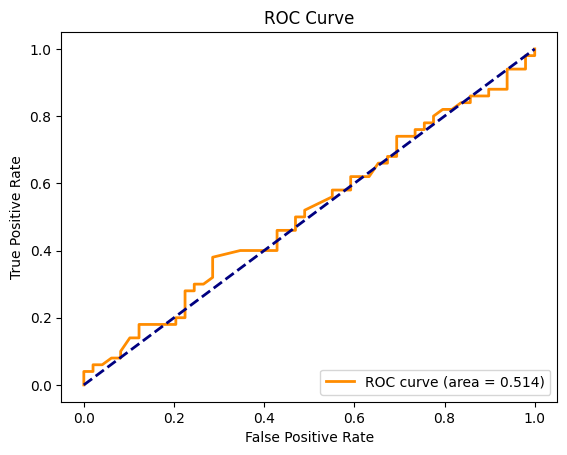

In [122]:
fprs, tprs, thersholds = roc_curve(y_true = df_test["deal"], y_score = df_test["y_prob"])
auc = roc_auc_score(y_true=df_test["deal"], y_score=df_test["y_prob"])

def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc(fprs, tprs, auc)

The pseudo $R^2$ is $0.02690$, which is low. Our model's AUC is $0.514$, which is not a very strong indicator of model strength. These values indicate that our model is not that strong.

The accuracy rate is calculated as follows:

$\frac{TP + TN}{Total}$ = $\frac{17 + 33}{99}$ = $0.505$

The sensitivity is calculated as follows:

$\frac{TP}{TP + FN}$ = $\frac{33}{33 + 17}$ = $0.66$

The specificity is calculated as follows:

$\frac{TN}{TN + FP}$ = $\frac{17}{17 + 32}$ = $0.345$

When considering what type of error we want to minimize, suppose that we are a group of entrepreneurs who want to go on Shark Tank. We want to maximize our chances of getting a deal. In this scenario, we want to minimize the errors such that we think that we will receive a deal but we actually do not. This type of error is a **false positive**. 

The false positive rate is calculated as follows:

$1-Specificity$ = $1 - 0.345$ = $0.655$

The false positive rate is pretty high $(<0.5)$. Therefore, we are not satisified with the performance of our classifier in terms of the error we want to minimize. In terms of other errors and characteristics of our classifier, the specificity is slightly greater than $0.5$; however, the specificity is lower than $0.5$. A well-performing model would have a specificity and sensitivity. Unfortunately, our model does not have these characteristics, which is why we are not satisfied with the performance of our classifier. 

**Summarization:** In this project, we performed two models, Linear Regression and Logistic Regression, to better understand the variables that influence investment results on Shark Tank. Linear regression was used to predict the amount of money a company asks for using the stake exchanged, valuation, deal status, and number of entrepreneurs. The model performed relatively well on the training data because the R^2 was 0.708. This means that about 70.8% of the variability in the amount asked for is explained by the predictor variables. On the other hand, the test RMSE was $547,654. This shows that the predictions varied from the trust amount of money by half a million dollars. Next, logistic regression modeled the log-odds of whether a company received a deal. Exchange-for-stake (p = 0.009) and the amount requested (p = 0.008) were shown to be important predictors of deal success in the model. Both coefficients were negative, meaning that the chance of getting a deal decreases as founders demand more funding or provide more stock. The variable 'multiple_entrepreneurs', however, was not statistically significant (p = 0.661).